<a href="https://colab.research.google.com/github/Musarrat06/TechnoHacks-Internship/blob/main/House_Price_Prediction_(Supervised_Regression_Task).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **House Price Prediction :**

#### **Introduction:**
In this data analysis and machine learning project, our objective is to predict house prices in King City, USA, using a dataset containing various features such as the number of bedrooms, bathrooms, square footage of living space, and more. The housing market is a crucial sector, and accurate price predictions can assist buyers, sellers, and real estate professionals in making informed decisions.

#### **Objective:**
The primary goal of this project is to develop a predictive model that can estimate house prices with high accuracy. To achieve this, we will perform data preprocessing, exploratory data analysis (EDA), feature engineering, and utilize various machine learning algorithms. By the end, we aim to select the best-performing model and provide insights into which factors influence house prices the most in the King City housing market.


### **Performing EDA**:

In [ ]:
# importing liabraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
HousePrice_df = pd.read_csv('kc_house_data.csv')        # Loading and reading csv find

In [ ]:
HousePrice_df.head()           # Fetching top 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
HousePrice_df.tail()      # Fetching last  rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
HousePrice_df.shape      # showing the number of rows and columns

(21613, 21)

- It has 21613 observations and 21 variables in this dataset.

In [ ]:
HousePrice_df.info()         # Information about the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
HousePrice_df.describe()        # describing the data.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
HousePrice_df.isnull().sum()       # checking for null values.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
HousePrice_df.columns           # checking for all the columns.

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
HousePrice_df.nunique()           # checking for the number of unique items in each column.

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [ ]:
HousePrice_df['bedrooms'].unique()           # chekcing for the unique items in bedrooms.

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

- Some extreme values are present in this column which is not possible as a number of bedrooms in a house. We will consider these values as outliers.

In [ ]:
HousePrice_df['condition'].unique()

array([3, 5, 4, 1, 2])

In [ ]:
HousePrice_df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [ ]:
HousePrice_df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [ ]:
HousePrice_df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

- These values in bathroom column can be considered as Fractional bathroom counts.

### **Univariate Analysis:**

<Axes: xlabel='price', ylabel='Count'>

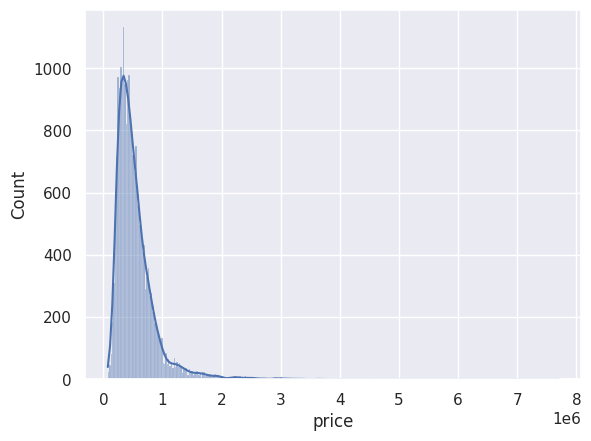

In [ ]:
sns.histplot(HousePrice_df['price'], kde=True)

<Axes: xlabel='count', ylabel='bedrooms'>

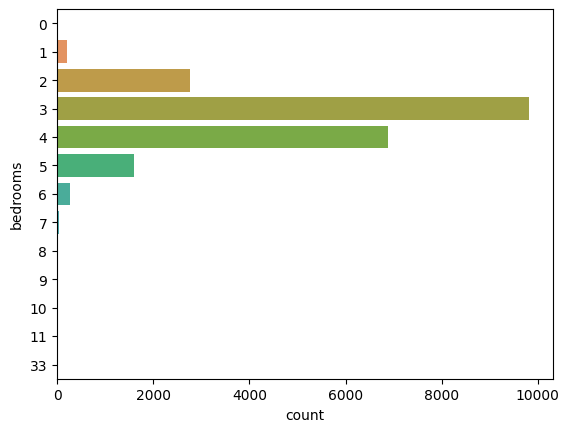

In [ ]:
sns.countplot(y=HousePrice_df['bedrooms'])

<Axes: xlabel='condition', ylabel='count'>

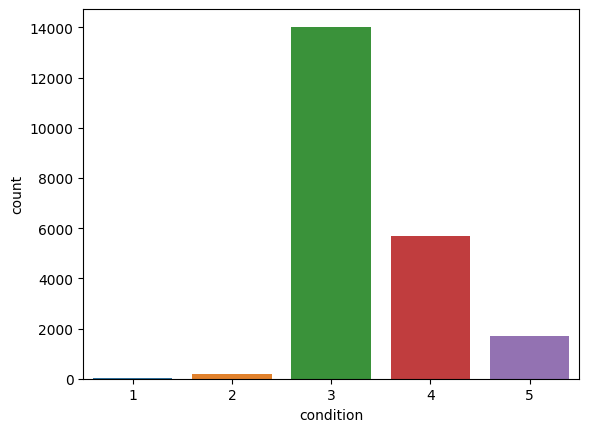

In [ ]:
sns.countplot(x=HousePrice_df['condition'])

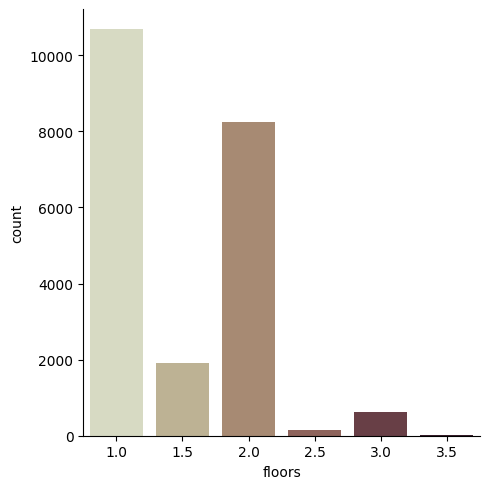

In [ ]:
sns.catplot(data=HousePrice_df, x="floors", kind="count", palette="ch:.50")

<Axes: xlabel='bathrooms', ylabel='Count'>

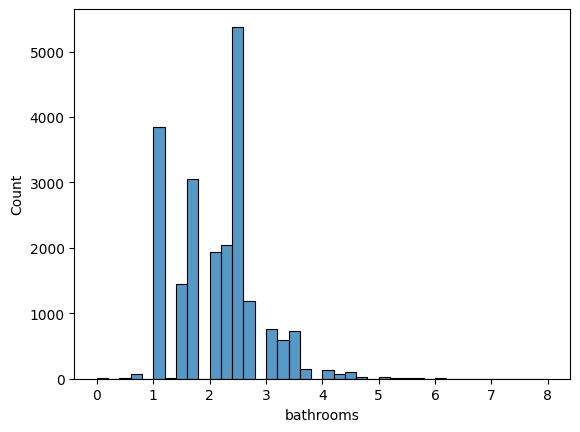

In [ ]:
sns.histplot(HousePrice_df, x='bathrooms', element='bars', fill=True, binwidth=0.2)

### **Bi-variate Analysis:**

<Axes: xlabel='sqft_living', ylabel='price'>

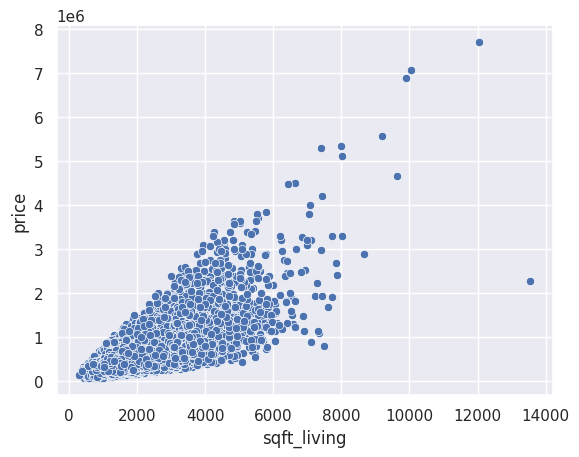

In [ ]:
sns.scatterplot(HousePrice_df, x='sqft_living', y='price')

- The graph represents the relationship between the number of bedrooms in a house and its average price. This information can be helpful for people who are thinking about buying a house, as it can help them to determine how many bedrooms they need and how much they are willing to spend.

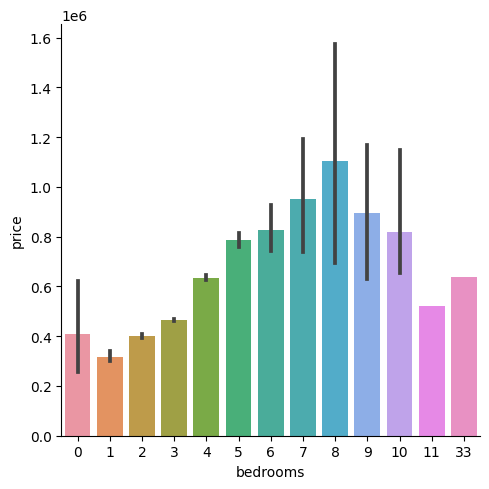

In [ ]:
sns.catplot(data=HousePrice_df, kind="bar", x="bedrooms", y="price")

- The demand for houses with more bedrooms is higher than the demand for houses with fewer bedrooms. This is likely because houses with more bedrooms are more suitable for families with children.
- 33 number of bedrooms are not possible, so these are the outliers in the dataset.

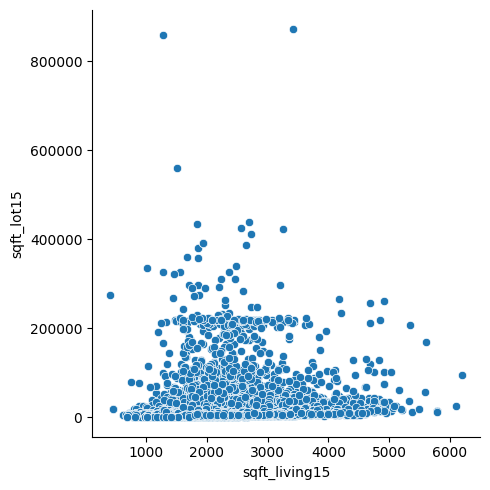

In [ ]:
sns.relplot(
    data=HousePrice_df,
    x="sqft_living15", y="sqft_lot15"
)

- There is a positive correlation between the square footage of living space and the square footage of lot.
- Houses with larger square footage of living space tend to be more expensive.
- There is a wide range of prices for houses with the same square footage of living space.

Text(22.569444444444443, 0.5, 'Price in millions')

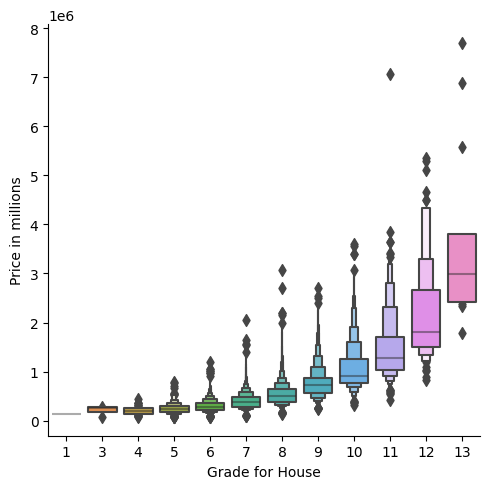

In [ ]:
sns.catplot(HousePrice_df, x='grade', y='price', kind='boxen')
plt.xlabel('Grade for House')
plt.ylabel('Price in millions')

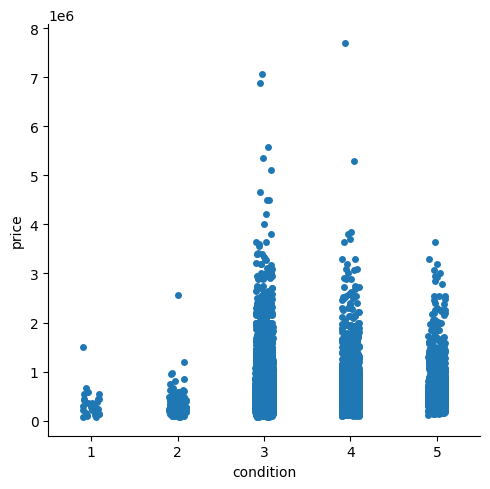

In [ ]:
sns.catplot(HousePrice_df, x='condition', y='price')

<Axes: xlabel='floors', ylabel='price'>

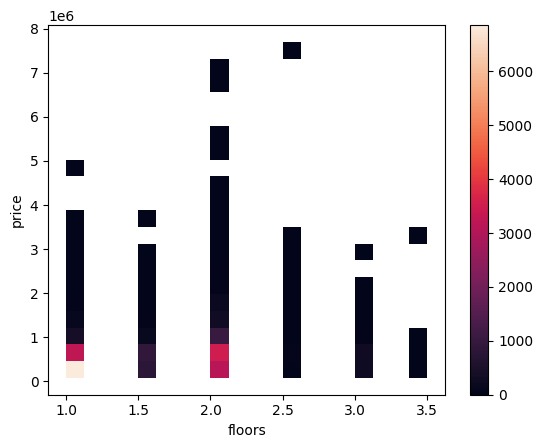

In [ ]:
sns.histplot(data=HousePrice_df, x='floors', y='price', bins=20, cbar=True, cmap='rocket')

- These insights suggest that the demand for houses with more floors is higher than the demand for houses with fewer floors. This is likely because houses with more floors are more suitable for families with children.

<Axes: xlabel='bedrooms', ylabel='price'>

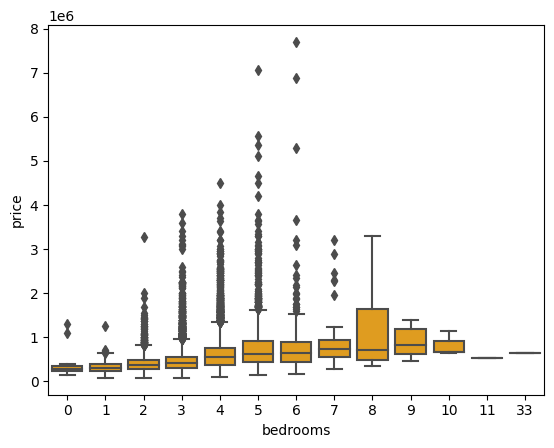

In [ ]:
sns.boxplot(data=HousePrice_df, x='bedrooms', y='price', color='orange')

The price of houses increases with the number of bedrooms.
The biggest jump in price is between 2 and 3 bedrooms.
The price difference between 3 and 4 bedrooms is smaller than the price difference between 2 and 3 bedrooms.
The price difference between 4 and 5 bedrooms is even smaller.
There is a small decrease in price for houses with 5.5 bedrooms.

### **Mutli-variate Analysis:**

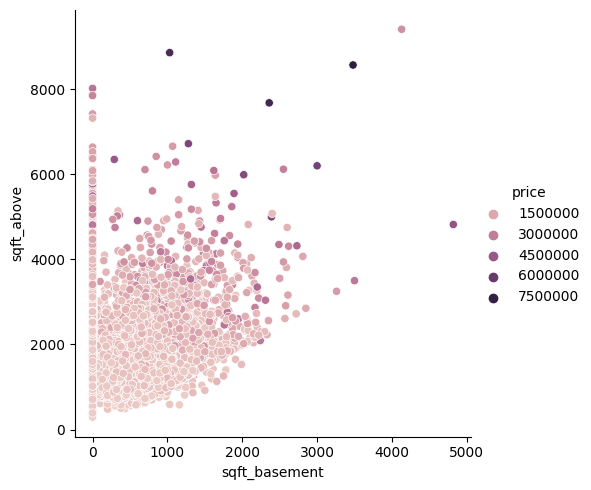

In [ ]:
sns.relplot(
    data=HousePrice_df,
    x="sqft_basement", y="sqft_above", hue="price"
)

- There is a positive correlation between the size of the basement and the price of the house. This means that, in general, houses with larger basements tend to be more expensive than houses with smaller basements.
- However, there is one point where the size of the basement is large but the price of the house is low. This may be because there are other factors that also affect the price of a house, such as the location, the number of bedrooms, or the condition of the house.

In [ ]:
House_price = HousePrice_df.copy()       # make copy of dataset.

In [ ]:
House_price = House_price.drop(columns=['id', 'date', 'zipcode'],axis=1)   # remove unwanted columns.

### **Dealing with Ouliers:**

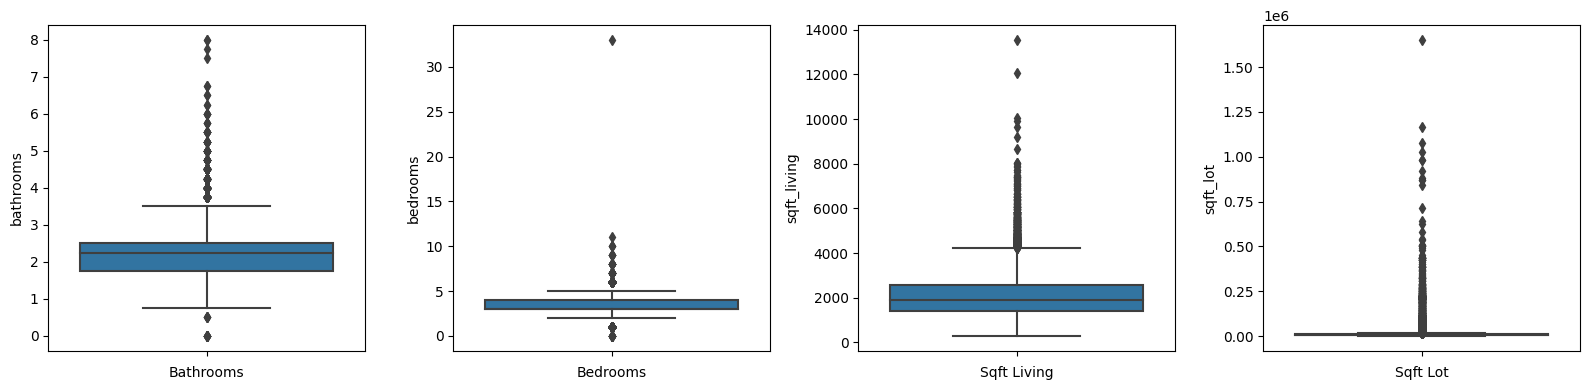

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # Adjust the number of subplots as needed

# Create box plots for different variables
sns.boxplot(y=HousePrice_df['bathrooms'], ax=axes[0]).set(xlabel='Bathrooms')
sns.boxplot(y=HousePrice_df['bedrooms'], ax=axes[1]).set(xlabel='Bedrooms')
sns.boxplot(y=HousePrice_df['sqft_living'], ax=axes[2]).set(xlabel='Sqft Living')
sns.boxplot(y=HousePrice_df['sqft_lot'], ax=axes[3]).set(xlabel='Sqft Lot')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

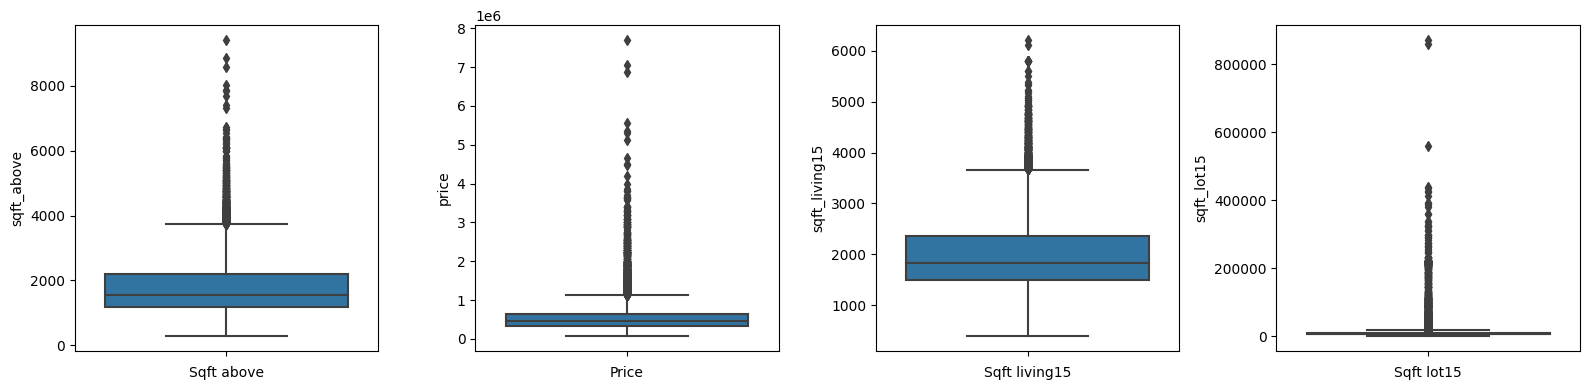

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # Adjust the number of subplots as needed

# Create box plots for different variables
sns.boxplot(y=HousePrice_df['sqft_above'], ax=axes[0]).set(xlabel='Sqft above')
sns.boxplot(y=HousePrice_df['price'], ax=axes[1]).set(xlabel='Price')
sns.boxplot(y=HousePrice_df['sqft_living15'], ax=axes[2]).set(xlabel='Sqft living15')
sns.boxplot(y=HousePrice_df['sqft_lot15'], ax=axes[3]).set(xlabel='Sqft lot15')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### **Dealing with Outliers:**

In [ ]:
# import numpy as np
Q1 = House_price.quantile(0.25)
Q3 = House_price.quantile(0.75)
IQR = Q3 - Q1

lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR


print(lower_bounds)
print("----------------------------------")
print(upper_bounds)


price           -162625.0000
bedrooms              1.5000
bathrooms             0.6250
sqft_living        -257.5000
sqft_lot          -3432.0000
floors               -0.5000
waterfront            0.0000
view                  0.0000
condition             1.5000
grade                 5.5000
sqft_above         -340.0000
sqft_basement      -840.0000
yr_built           1882.0000
yr_renovated          0.0000
lat                  47.1605
long               -122.6325
sqft_living15       185.0000
sqft_lot15        -2374.5000
dtype: float64
----------------------------------
price            1.129575e+06
bedrooms         5.500000e+00
bathrooms        3.625000e+00
sqft_living      4.234500e+03
sqft_lot         1.916000e+04
floors           3.500000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        5.500000e+00
grade            9.500000e+00
sqft_above       3.740000e+03
sqft_basement    1.400000e+03
yr_built         2.066000e+03
yr_renovated     0.000000e+00
lat     

- Removing these outliers may not be a good approach as we can lose the maximum data. Let's use capping technique to reduce these outliers.

**Capping Outliers:**

In [ ]:
# Cap outliers by setting values above the upper bound to the upper bound
# and values below the lower bound to the lower bound
House_price_capped = House_price.copy()
for column in House_price.columns:
    House_price_capped[column] = np.where(
        House_price_capped[column] > upper_bounds[column], upper_bounds[column], House_price_capped[column]
    )
    House_price_capped[column] = np.where(
        House_price_capped[column] < lower_bounds[column], lower_bounds[column], House_price_capped[column]
    )

House_price_capped.shape

(21613, 18)

- **Now we will analyze the variables after capping the outliers.**

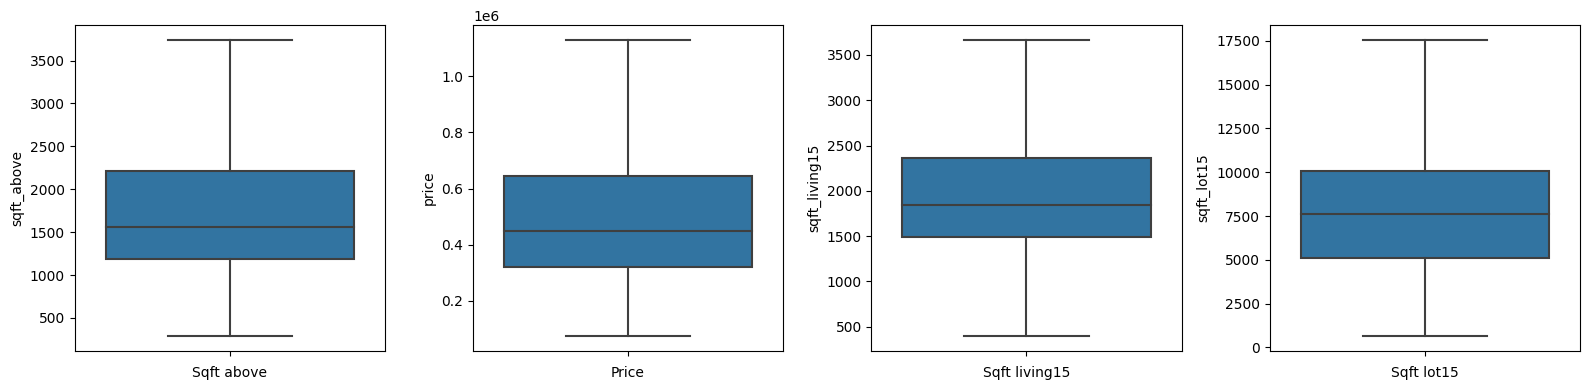

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # Adjust the number of subplots as needed

# Create box plots for different variables
sns.boxplot(y=House_price_capped['sqft_above'], ax=axes[0]).set(xlabel='Sqft above')
sns.boxplot(y=House_price_capped['price'], ax=axes[1]).set(xlabel='Price')
sns.boxplot(y=House_price_capped['sqft_living15'], ax=axes[2]).set(xlabel='Sqft living15')
sns.boxplot(y=House_price_capped['sqft_lot15'], ax=axes[3]).set(xlabel='Sqft lot15')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

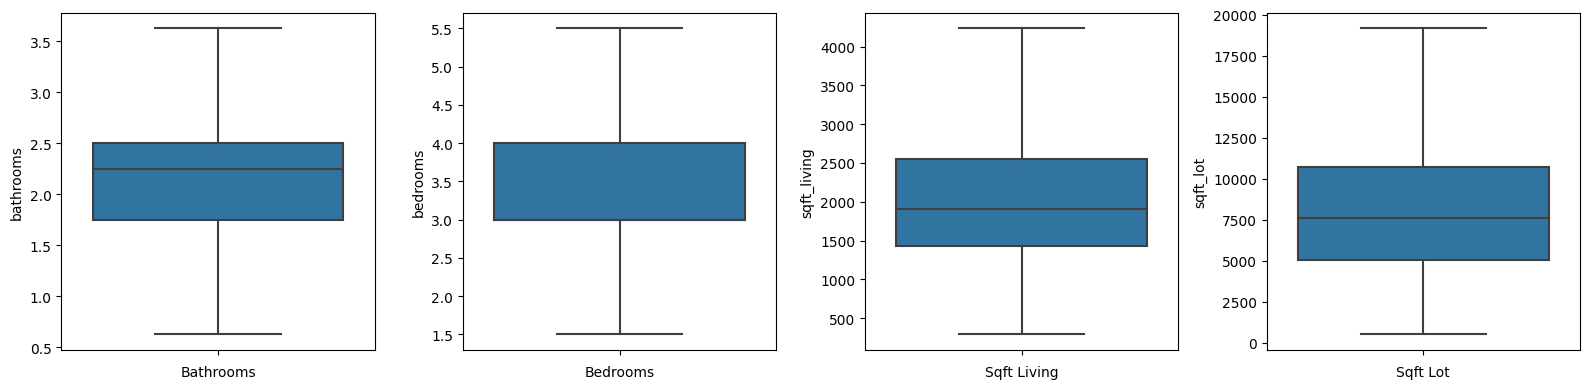

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # Adjust the number of subplots as needed

# Create box plots for different variables
sns.boxplot(y=House_price_capped['bathrooms'], ax=axes[0]).set(xlabel='Bathrooms')
sns.boxplot(y=House_price_capped['bedrooms'], ax=axes[1]).set(xlabel='Bedrooms')
sns.boxplot(y=House_price_capped['sqft_living'], ax=axes[2]).set(xlabel='Sqft Living')
sns.boxplot(y=House_price_capped['sqft_lot'], ax=axes[3]).set(xlabel='Sqft Lot')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# sns.boxplot(y=House_price_no_outliers['price']).set(xlabel='Bedrooms')
# sns.set(rc={'figure.figsize':(3,3)})


### **Dealing with Skewness:**

In [ ]:
House_price_capped.skew()

price            0.9366357798
bedrooms         0.2407904018
bathrooms        0.0435973153
sqft_living      0.7292608624
sqft_lot         0.8321416176
floors           0.6161767212
waterfront       0.0000000000
view             0.0000000000
condition        1.0764335676
grade            0.2785616882
sqft_above       0.9054336701
sqft_basement    1.2190205371
yr_built        -0.4698053988
yr_renovated     0.0000000000
lat             -0.4852356674
long             0.6710120511
sqft_living15    0.7741322045
sqft_lot15       0.7682050106
dtype: float64

- "price" has a positive skewness (0.937), suggesting that house prices are right-skewed, with a concentration of lower-priced houses and a tail of higher-priced houses.
- "bedrooms," "bathrooms," "floors," "waterfront," "view," "yr_renovated" have skewness values of 0, indicating that their distributions are fairly symmetrical.
- "condition" and "sqft_basement" have positive skewness, suggesting that they are right-skewed.
- "sqft_living," "sqft_lot," "sqft_above," "yr_built," "lat," "long," "sqft_living15," and "sqft_lot15" also exhibit some degree of skewness.

### **Transforming Data:**

In [ ]:
# Applying square root Transformation:

import numpy as np
House_price_Transformed = House_price_capped.copy()
House_price_Transformed['price'] = House_price_Transformed['price'].apply(lambda x: np.sqrt(x))
House_price_Transformed['sqft_living'] = House_price_Transformed['sqft_living'].apply(lambda x: np.sqrt(x))
House_price_Transformed['sqft_lot'] = House_price_Transformed['sqft_lot'].apply(lambda x: np.sqrt(x))
House_price_Transformed['sqft_above'] = House_price_Transformed['sqft_above'].apply(lambda x: np.sqrt(x))
House_price_Transformed['sqft_basement'] = House_price_Transformed['sqft_basement'].apply(lambda x: np.sqrt(x))
House_price_Transformed['sqft_living15'] = House_price_Transformed['sqft_living15'].apply(lambda x: np.sqrt(x))
House_price_Transformed['sqft_lot15'] = House_price_Transformed['sqft_lot15'].apply(lambda x: np.sqrt(x))
House_price_Transformed['sqft_basement'] = House_price_Transformed['sqft_basement'].apply(lambda x: np.sqrt(x))

In [ ]:
House_price_Transformed.skew()

price            0.479953
bedrooms         0.240790
bathrooms        0.043597
sqft_living      0.295389
sqft_lot         0.190101
floors           0.616177
waterfront       0.000000
view             0.000000
condition        1.076434
grade            0.278562
sqft_above       0.535432
sqft_basement    0.532270
yr_built        -0.469805
yr_renovated     0.000000
lat             -0.485236
long             0.671012
sqft_living15    0.444881
sqft_lot15       0.110348
dtype: float64

#### **Let's visualize the data after reducing the outliers and skewness:**

#### **Univariate Analysis:**

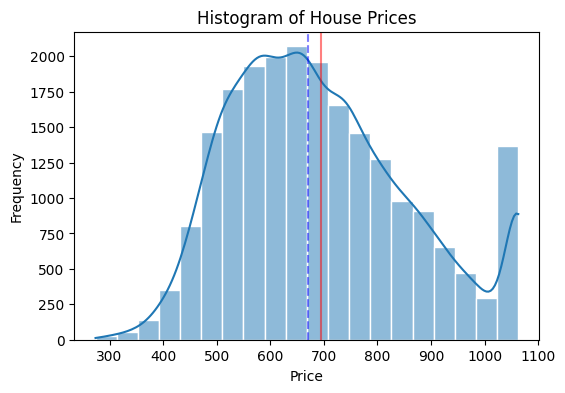

Skewness :  0.47995318099957224


In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of house prices
plt.figure(figsize=(6, 4))
sns.histplot(House_price_Transformed['price'], bins=20, edgecolor='w', kde=True)
plt.axvline(x=House_price_Transformed.price.mean(), color='red', alpha=0.5, label='Mean')
plt.axvline(x=House_price_Transformed.price.median(), color='blue', ls='--', alpha=0.5, label='Median')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of House Prices')
plt.show()
print("Skewness : ",House_price_Transformed['price'].skew())

- We can see here after capping outliers and applying square root transformation technique the price column looks symmetric.

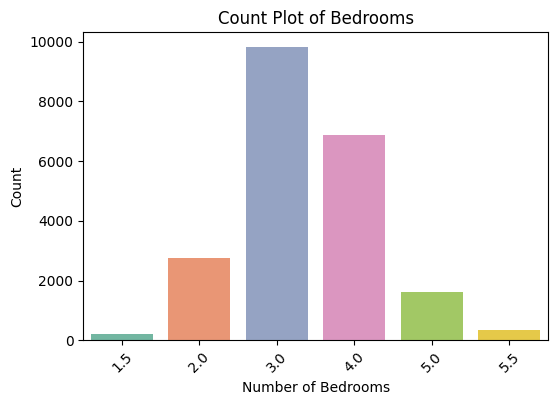

In [ ]:
bedrooms = House_price_Transformed['bedrooms']

# Create the count plot using Seaborn
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.countplot(x=bedrooms, palette="Set2")  # Use Seaborn's countplot

# Add labels and a title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Count Plot of Bedrooms')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

- We can see that the houses with 3 bedrooms are more. This is likely because 3 bedrooms are sufficient for most families. There are also a significant number of houses with 2 or 4 bedrooms, which may be suitable for smaller families or single people.

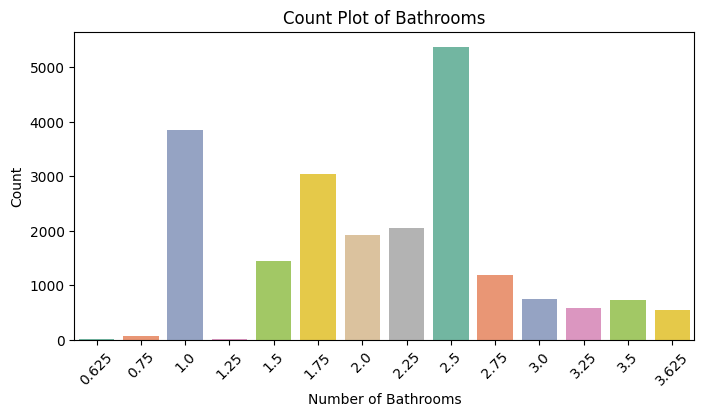

In [ ]:
bedrooms = House_price_Transformed['bathrooms']

# Create the count plot using Seaborn
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
sns.countplot(x=bedrooms, palette="Set2")  # Use Seaborn's countplot

# Add labels and a title
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Count Plot of Bathrooms')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

- Most houses have 2 bathrooms. This is likely because 2 bathrooms are sufficient for most families. There are also a significant number of houses with 1 or 3 bathrooms, which may be suitable for smaller families or single people.
- Houses with 0.5 bathrooms may only have a half-bathroom, which is typically a toilet and sink located in a hallway or other common area. A house with 3.5 bathrooms may have a master bathroom with a bathtub and shower, plus two other bathrooms with showers only.

#### **Bi-variate Analysis:**

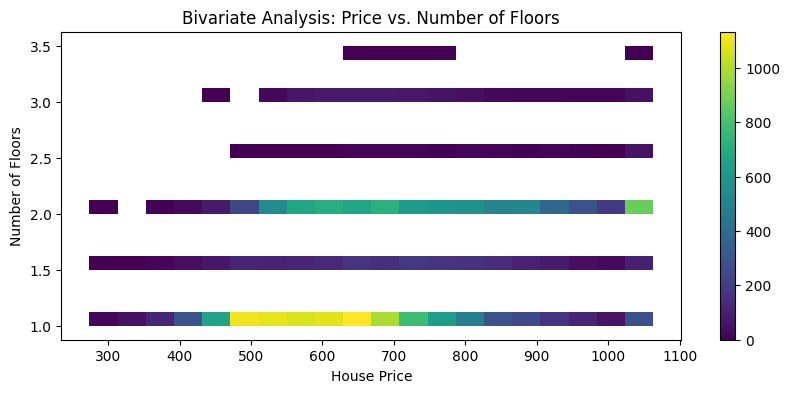

In [ ]:
#  Create a 2D histogram
plt.figure(figsize=(10, 4))
sns.histplot(data=House_price_Transformed, x='price', y='floors', bins=20, cbar=True, cmap='viridis')

# Set labels and title
plt.xlabel('House Price')
plt.ylabel('Number of Floors')
plt.title('Bivariate Analysis: Price vs. Number of Floors')

# Show the plot
plt.show()

- The insight that can be drawn from this visual is that the number of floors is a significant factor in determining the price of a house. This is because people are more likely to pay more for a house with more floors.

<Figure size 600x400 with 0 Axes>

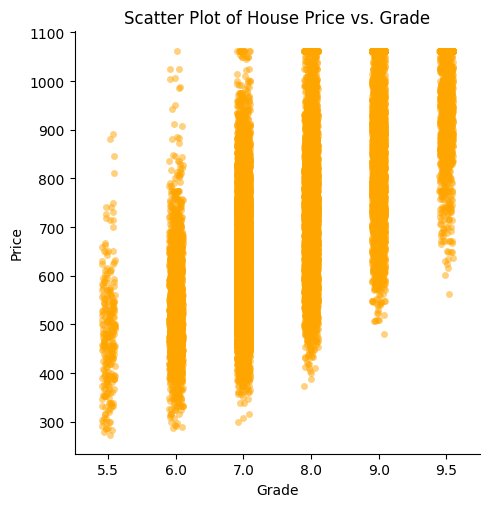

In [ ]:
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

# Create a scatter plot of 'grade' vs. 'price'
sns.catplot(data=House_price_Transformed, x='grade', y='price', color='orange', alpha=0.5)

# Set labels and titles
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Scatter Plot of House Price vs. Grade')

# Display the plot
plt.show()

- We can see that the people are more likely to pay more for a house with a higher grade.

<Axes: xlabel='bedrooms', ylabel='price'>

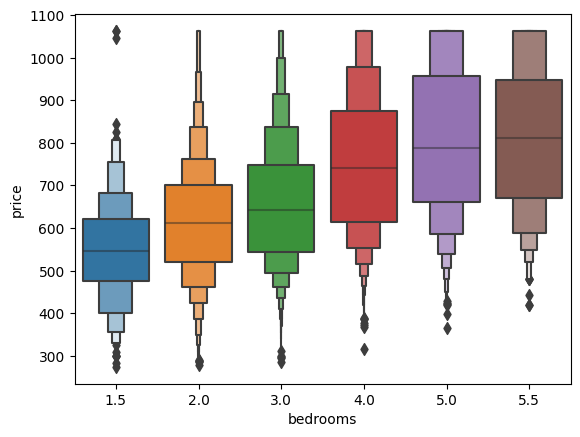

In [ ]:
sns.boxenplot(data=House_price_Transformed, x='bedrooms', y='price',)  # Use alpha for transparency

- The price of houses increases with the number of bedrooms.
- The biggest jump in price is between 2 and 3 bedrooms.
- The price difference between 3 and 4 bedrooms is smaller than the price difference between 2 and 3 bedrooms.
- The price difference between 4 and 5 bedrooms is even smaller.
- There is a small decrease in price for houses with 5.5 bedrooms.
- These insights suggest that the demand for houses with more bedrooms is higher than the demand for houses with fewer bedrooms. This is likely because houses with more bedrooms are more suitable for families with children.

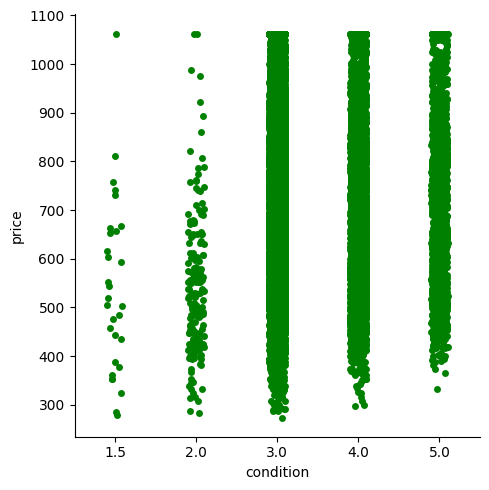

In [ ]:
sns.catplot(House_price_Transformed, x='condition', y='price', color='green')

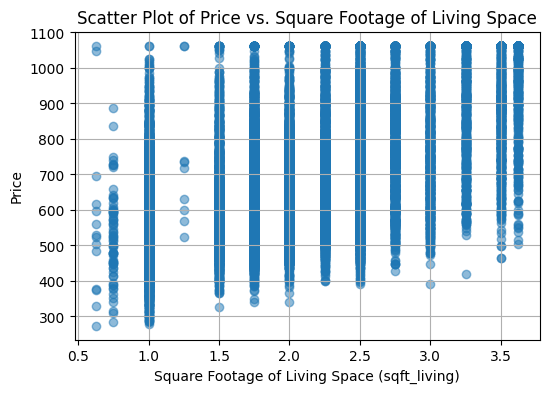

In [ ]:
price = House_price_Transformed['price']
sqft_living = House_price_Transformed['bathrooms']

# Create the scatter plot
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.scatter(sqft_living, price, alpha=0.5)  # Use alpha for transparency

# Add labels and a title
plt.xlabel('Square Footage of Living Space (sqft_living)')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Square Footage of Living Space')

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.show()

- The square footage of living space is a significant factor in determining the price of a house. This is because people are more likely to pay more for a house with more living space.

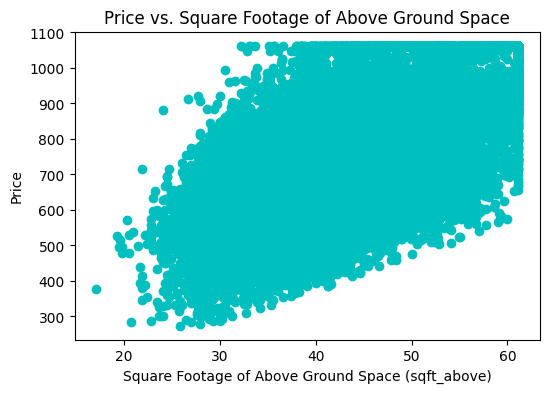

In [ ]:
price = House_price_Transformed['price']
sqft_above = House_price_Transformed['sqft_above']

# Create a scatter plot
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.scatter(sqft_above, price, c='c', marker='o')

# Add labels and a title
plt.xlabel('Square Footage of Above Ground Space (sqft_above)')
plt.ylabel('Price')
plt.title('Price vs. Square Footage of Above Ground Space')

# Show the plot
# plt.grid(True)
plt.show()

- The correlation is not perfect, so there are some houses with a high square footage of above ground space that are relatively inexpensive, and some houses with a low square footage of above ground space that are relatively expensive.

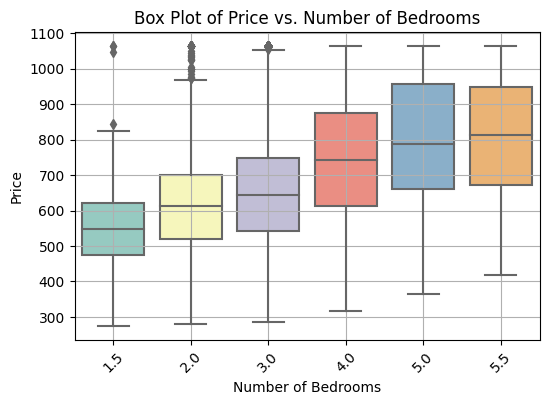

In [ ]:
price = House_price_Transformed['price']
bedrooms = House_price_Transformed['bedrooms']

# Create the box plot using Seaborn
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.boxplot(x=bedrooms, y=price, palette="Set3")  # Use Seaborn's boxplot

# Add labels and a title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Box Plot of Price vs. Number of Bedrooms')

# Show the plot
plt.grid(True)  # Optionally, add grid lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

- The box plot shows that the wider range of prices for houses with more bedrooms. This is because there are more outliers for houses with more bedrooms.

### **Mutli-variate Analysis:**

Text(0.5, 0, 'Square Footage of Living Space (sqft_living)')

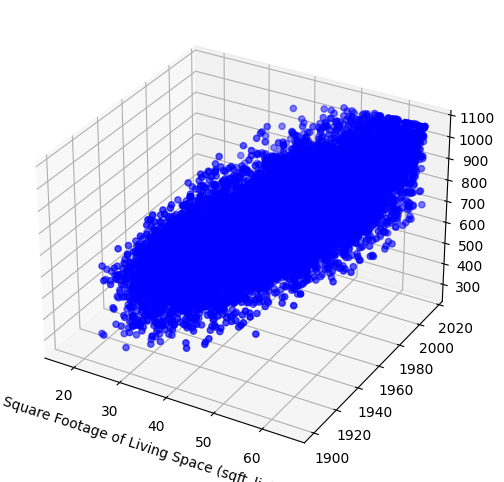

In [ ]:
price = House_price_Transformed['price']
sqft_living = House_price_Transformed['sqft_living']
yr_built = House_price_Transformed['yr_built']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sqft_living, yr_built, price, c='b', marker='o')

# Add labels and a title
ax.set_xlabel('Square Footage of Living Space (sqft_living)')

We can see from the above 3d-scatter plot that the scatter plot is showing the some relationship between square footage of living space, renovated year and the house price.

**Insights from visual:**
- As the square footage of living space increases the price of house also increases.
- The houses which are renovated recently are more expensive than the houses which have renovated in the previous years.


### **Heatmap Correlation Analysis:**

In [ ]:
Corr = House_price_Transformed.corr(method='pearson').round(3)

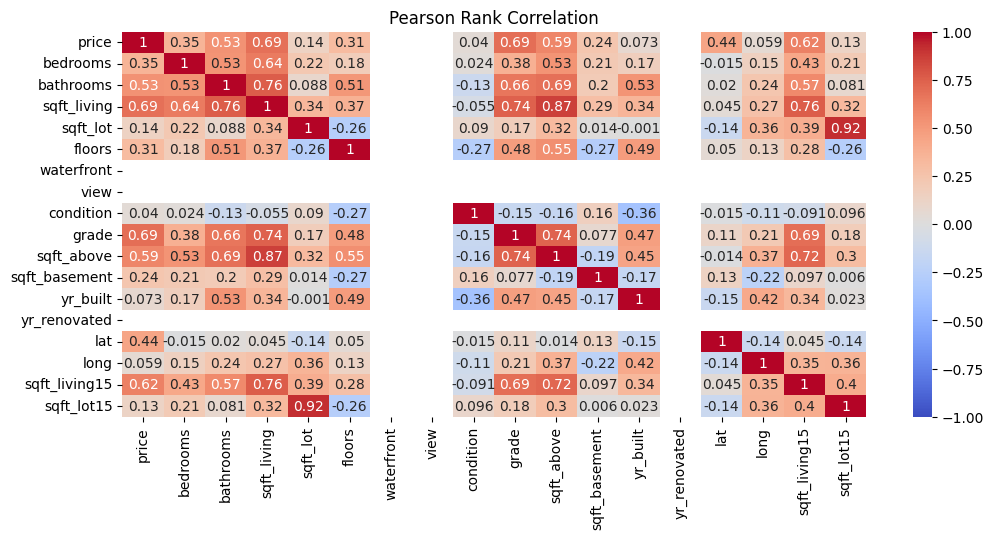

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.heatmap(Corr, annot=True, cbar=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Rank Correlation")
plt.show()

- The bedrooms, floors, sqft_lot, codition, yr_built, longitude, sqft_lot15, sqft_basement are having relatively weak positive correlation with the target variable i.e price. It suggests that as the number of these variables increases, house prices tend to increase, but the correlation is not very strong.

- The bathrooms, sqft_living, latitude are having a moderate positive correlation with price. As the number of variables in a house increases, house prices tend to increase.

- The grade, sqft_above, sqft_living15, indicates a strong positive correlation with price.

### **Splitting the Dataset:**

In [ ]:
X = House_price_Transformed.drop('price',axis=1)
y = House_price_Transformed['price']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


         Variable            VIF
0        bedrooms      29.717808
1       bathrooms      32.146469
2     sqft_living     755.282555
3        sqft_lot      81.712288
4          floors      21.875657
5      waterfront            NaN
6            view            NaN
7       condition      34.505073
8           grade     181.133307
9      sqft_above     676.758519
10  sqft_basement      11.805295
11       yr_built    7810.717716
12   yr_renovated            NaN
13            lat  119890.107253
14           long  131055.012177
15  sqft_living15     114.068121
16     sqft_lot15      96.442185


- **calculating p-values.**

In [ ]:
import statsmodels.api as sm

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.10f}'.format

# Add a constant to the predictor variables for the intercept term
X_train = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Get the p-values for each predictor variable
p_values = model.pvalues

p_values_df = pd.DataFrame({"variable" : X.columns, "P-value" : p_values})

# Print the DataFrame
print("Variable Names and P-values:")
print(p_values_df)

Variable Names and P-values:
                    variable      P-value
bedrooms            bedrooms 0.0000000000
bathrooms          bathrooms 0.0000000000
sqft_living      sqft_living 0.0000000000
sqft_lot            sqft_lot 0.0003979387
floors                floors 0.0000000000
waterfront        waterfront 0.0000000000
view                    view 0.0000000000
condition          condition 0.0000000000
grade                  grade 0.0000000000
sqft_above        sqft_above 0.0000000010
sqft_basement  sqft_basement 0.0000000000
yr_built            yr_built 0.0000000000
yr_renovated    yr_renovated 0.0000000000
lat                      lat 0.0000000000
long                    long 0.0000000000
sqft_living15  sqft_living15 0.0000000000
sqft_lot15        sqft_lot15 0.0000000089


-  As we can see all the Variables have extremely low p-values (e.g., close to zero). This indicates that they are statistically significant and likely have an impact on house prices. So we can say that the Null Hypothesis(H0) Rejected for all these variables in favour of Alternative Hypothesis(H1).

## **Model Building:**

**XG-Boost Regressor:**

In [ ]:
from sklearn.model_selection import train_test_split

# splitting X & y variabel into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [ ]:
import xgboost as xgb

xg_model = xgb.XGBRegressor(objective='reg:linear',     # Use squared error as the loss function (for regression)
                            n_estimators=100,           # Number of boosting rounds (trees)
                            learning_rate=0.1,          # Step size shrinkage to prevent overfitting
                            max_depth=3,                # Maximum depth of individual trees
                            random_state=100)           # Random seed for reproducibility

xg_model.fit(X_train, y_train)

[14:29:55] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_train = xg_model.predict(X_train)

# Evaluate the model's performance on training data
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Training Data Metrics: XG-Boost : ")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"R-squared (R2) Score: {r2_train:.2f}")

Training Data Metrics: XG-Boost : 
Mean Squared Error (MSE): 3494.97
Root Mean Squared Error (RMSE): 59.12
Mean Absolute Error (MAE): 43.17
R-squared (R2) Score: 0.88


In [ ]:
y_pred_test = xg_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTesting Data Metrics: XG-Boost : ")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R-squared (R2) Score: {r2_test:.2f}")


Testing Data Metrics: XG-Boost : 
Mean Squared Error (MSE): 3678.89
Root Mean Squared Error (RMSE): 60.65
Mean Absolute Error (MAE): 44.29
R-squared (R2) Score: 0.87


**Linear Rgression:**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_train = linear_model.predict(X_train)

# Evaluate the model's performance on training data
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Training Data Metrics: Linear Regression : ")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"R-squared (R2) Score: {r2_train:.2f}")


Training Data Metrics: Linear Regression : 
Mean Squared Error (MSE): 7068.04
Root Mean Squared Error (RMSE): 84.07
Mean Absolute Error (MAE): 65.32
R-squared (R2) Score: 0.75


In [ ]:
y_pred_test = linear_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTesting Data Metrics: Linear Regression : ")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R-squared (R2) Score: {r2_test:.2f}")


Testing Data Metrics: Linear Regression : 
Mean Squared Error (MSE): 7186.07
Root Mean Squared Error (RMSE): 84.77
Mean Absolute Error (MAE): 66.01
R-squared (R2) Score: 0.74


In [ ]:
# Optionally, you can also examine the model coefficients and intercept
coefficients = linear_model.coef_

print("Coefficients:", coefficients)

Coefficients: [-1.29927363e+01  2.07013833e+01  3.40366279e+00 -7.34806555e-02
  8.51195796e+00 -1.27897692e-13 -4.26325641e-14  1.91162898e+01
  6.26924330e+01  2.98267360e+00  4.76919913e+00 -1.43964513e+00
 -1.35003120e-13  3.99911700e+02 -1.16222923e+01  3.94256891e+00
 -3.06248335e-01]


**Gradient Boosting Regressor:**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=120)

# Create and train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(
    n_estimators=100,       # Number of boosting rounds (trees)
    learning_rate=0.1,      # Step size shrinkage to prevent overfitting
    max_depth=5,            # Maximum depth of individual trees
    random_state=100,        # Random seed for reproducibility
    min_samples_split=2,
    min_samples_leaf=3
)

gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=3, random_state=100)

In [ ]:
# Make predictions on the test set
y_pred_train_gb = gb_regressor.predict(X_train)
y_pred_test_gb = gb_regressor.predict(X_test)

In [ ]:
# Evaluate the Gradient Boosting Regressor model
mse_gb_train = mean_squared_error(y_train, y_pred_train_gb)
rmse_gb_train = np.sqrt(mse_gb_train)
r2_gb_train = r2_score(y_train, y_pred_train_gb)

print("Training Data Metrics : Gradient Boosting Regression : ")
print(f"Mean Squared Error (MSE): {mse_gb_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb_train:.2f}")
print(f"R-squared (R2) Score: {r2_gb_train:.2f}")

Training Data Metrics : Gradient Boosting Regression : 
Mean Squared Error (MSE): 2409.00
Root Mean Squared Error (RMSE): 49.08
R-squared (R2) Score: 0.91


In [ ]:
# Evaluate the Gradient Boosting Regressor model
mse_gb_test = mean_squared_error(y_test, y_pred_test_gb)
rmse_gb_test = np.sqrt(mse_gb_test)
r2_gb_test = r2_score(y_test, y_pred_test_gb)

print("Test Data Metrics : Gradient Boosting Regression : ")
print(f"Mean Squared Error (MSE): {mse_gb_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb_test:.2f}")
print(f"R-squared (R2) Score: {r2_gb_test:.2f}")

Test Data Metrics : Gradient Boosting Regression : 
Mean Squared Error (MSE): 3175.24
Root Mean Squared Error (RMSE): 56.35
R-squared (R2) Score: 0.89


**RandomForest:**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# scaler = StandardScaler()
# scaler.fit_transform(X_train)
# scaler.transform(X_test)


rfc = RandomForestRegressor(max_depth=7, random_state=120, min_samples_split=5, min_samples_leaf=3)
rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=5,
                      random_state=120)

In [ ]:
y_pred_train = rfc.predict(X_train)

# Evaluate the model's performance on training data
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Training Data Metrics : RandomForest Regressor")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"R-squared (R2) Score: {r2_train:.2f}")

Training Data Metrics : RandomForest Regressor
Mean Squared Error (MSE): 3988.50
Root Mean Squared Error (RMSE): 63.15
Mean Absolute Error (MAE): 46.07
R-squared (R2) Score: 0.86


In [ ]:
y_pred_test = rfc.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Testing Data Metrics : RandomForest Regressor : ")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R-squared (R2) Score: {r2_test:.2f}")

Testing Data Metrics : RandomForest Regressor : 
Mean Squared Error (MSE): 4583.84
Root Mean Squared Error (RMSE): 67.70
Mean Absolute Error (MAE): 49.09
R-squared (R2) Score: 0.84


### **Conclusion:**

**XG-Boost:** This model performs quite well with a low Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) on both training and testing data. It also has a high R-squared (R2) score, indicating that it explains a significant portion of the variance in the target variable.

**Linear Regression:** Linear regression performs decently but not as well as XG-Boost. It has higher MSE, RMSE, and MAE values on both training and testing data. The R2 score is lower, indicating that it doesn't explain the variance in the target variable as effectively as XG-Boost.

**Gradient Boosting Regression:** This model performs very well with a low MSE and RMSE on both training and testing data. It has a high R2 score, indicating strong predictive power and good explanatory ability.

**Random Forest Regressor:** The Random Forest model also performs well, with relatively low MSE, RMSE, and MAE values on both training and testing data. Its R2 score is high, suggesting a good fit to the data.

Based on these results, the Gradient Boosting Regression model seems to be performing the best, closely followed by XG-Boost. These models provide the lowest errors and the highest R2 scores, indicating their ability to predict house prices effectively.